In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Load the historical weather data
data = pd.read_csv("dataset2.csv")

# Create the feature matrix
features = ["temperature", "humidity", "windspd", "cloud covers"]
X = data[features]
data['windspd'] = data['windspd'].astype('float')


# Create the target variable
y = data["rainfall"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(y_train)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_train= scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))


# Train the random forest regressor model
rf_model = RandomForestRegressor()
p=rf_model.fit(X_train, y_train)

# Train the ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Train the k nearest neighbors model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Make predictions for the next harvest year
rf_predictions = rf_model.predict(X_test) 
ridge_predictions = ridge_model.predict(X_test)
knn_predictions = knn_model.predict(X_test)

# Evaluate the models' performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_rmse = np.sqrt(knn_mse)

print("Model performance:")
print("Random Forest Regressor:")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse )
print("\n")
print("Ridge Regression:")
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse) 
print("\n")

print("K Nearest Neighbors:")
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("\n")

# Save the models for future use
import pickle
pickle.dump(rf_model, open("rf_rainfall_prediction_model.pkl", "wb"))
pickle.dump(ridge_model, open("ridge_rainfall_prediction_model.pkl", "wb"))
pickle.dump(knn_model, open("knn_rainfall_prediction_model.pkl", "wb"))



177    1311
196    1000
63     1375
54     1500
107     790
50     1400
174    1290
210    1500
169    1255
58     1250
48     1350
88     3200
21     4350
57     1225
160    1350
206    1100
187    3050
129    1575
37     2950
157    1320
201    1050
1       810
52     1450
149    1225
130    1600
151    1275
103     750
99      710
116     540
87     3150
202    1060
74      740
121     590
213    1530
20     4300
188    3060
71      710
106     780
14     4000
92     3400
179    1325
102     740
Name: rainfall, dtype: int64
Model performance:
Random Forest Regressor:
MSE: 0.03394607152000186
RMSE: 0.18424459698998466


Ridge Regression:
MSE: 0.02620194200767163
RMSE: 0.1618701393329592


K Nearest Neighbors:
MSE: 0.03455670967104208
RMSE: 0.18589435083143888




/tmp/ipykernel_481/2187480399.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  p=rf_model.fit(X_train, y_train)


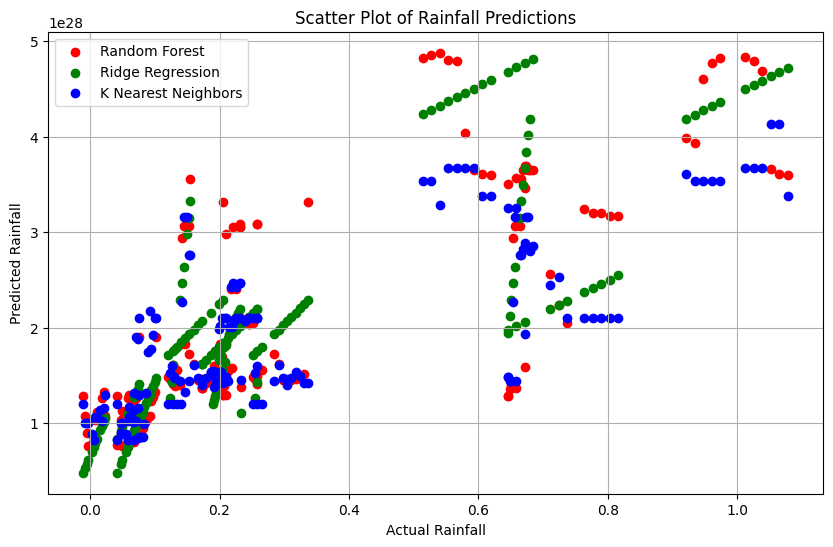

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Invert the scaling for the predictions
rf_predictions = scaler.inverse_transform(rf_predictions.reshape(-1, 1))
ridge_predictions = scaler.inverse_transform(ridge_predictions.reshape(-1, 1))
knn_predictions = scaler.inverse_transform(knn_predictions.reshape(-1, 1))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='red', label='Random Forest')
plt.scatter(y_test, ridge_predictions, color='green', label='Ridge Regression')
plt.scatter(y_test, knn_predictions, color='blue', label='K Nearest Neighbors')

# Add labels and title
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Scatter Plot of Rainfall Predictions')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


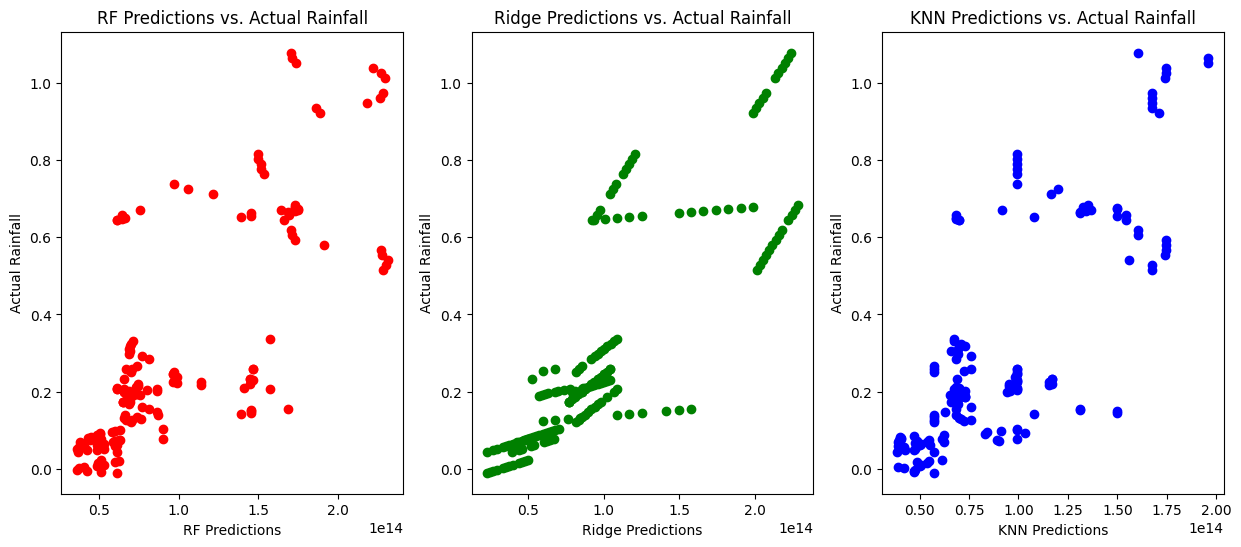

In [48]:
# Create the scatter plots
plt.figure(figsize=(15, 6))

# First scatter plot
plt.subplot(1, 3, 1)
plt.scatter(rf_predictions, y_test, color='red', label='RF')
plt.xlabel('RF Predictions')
plt.ylabel('Actual Rainfall')
plt.title('RF Predictions vs. Actual Rainfall')


# Second scatter plot
plt.subplot(1, 3, 2)
plt.scatter(ridge_predictions,y_test, color='green', label='Ridge')
plt.xlabel('Ridge Predictions')
plt.ylabel('Actual Rainfall')
plt.title('Ridge Predictions vs. Actual Rainfall')

# Third scatter plot
plt.subplot(1, 3, 3)
plt.scatter(knn_predictions, y_test, color='blue', label='KNN')
plt.xlabel('KNN Predictions')
plt.ylabel('Actual Rainfall')
plt.title('KNN Predictions vs. Actual Rainfall')

# Show the plot
plt.show()

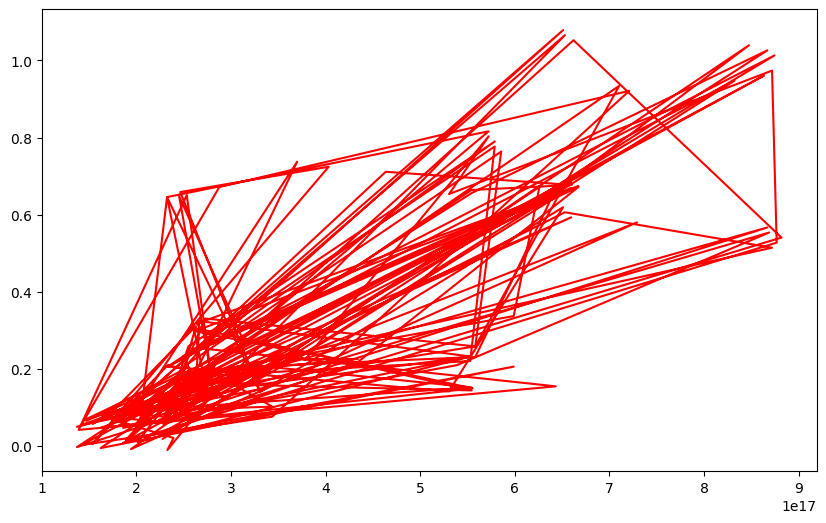

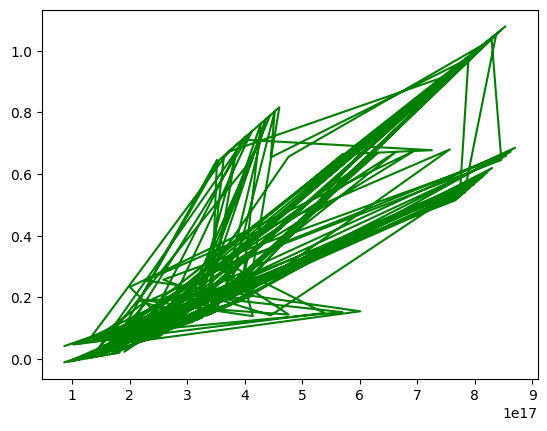

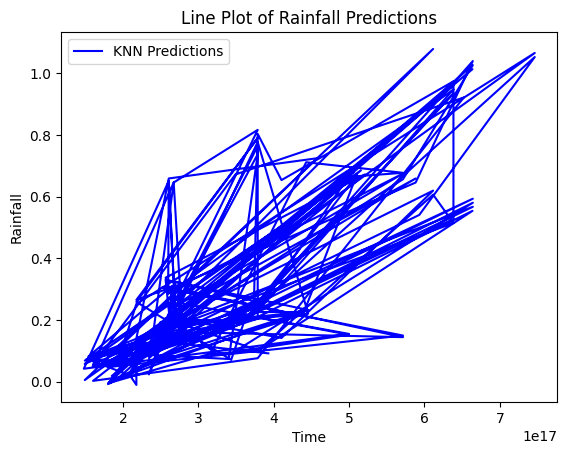

In [56]:
actual_rainfall = data["rainfall"]

# Create the line plot
plt.figure(figsize=(10, 6))

# Plot the actual rainfall


# Plot the predictions from the three models
plt.plot(rf_predictions, y_test,label='RF Predictions', color='red')
plt.show()
plt.plot(ridge_predictions, y_test,label='Ridge Predictions', color='green') 
plt.show()
plt.plot(knn_predictions, y_test,label='KNN Predictions', color='blue') 


# Add labels and title
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.title('Line Plot of Rainfall Predictions')

# Add legend
plt.legend()

# Show the plot

plt.show()